In [14]:
import warnings

warnings.filterwarnings(
    "ignore", category=RuntimeWarning, message="overflow encountered in exp"
)

In [15]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from infomeasure import entropy
from torchvision import datasets, transforms

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch Version: 2.9.1+cu126
CUDA available: True


In [16]:
# download mnist dataset to data directory

data_dir = os.path.join("../../../..", "data")
os.makedirs(data_dir, exist_ok=True)

transform = transforms.Compose([transforms.ToTensor()])
mnist_test = datasets.MNIST(
    root=data_dir, train=False, download=True, transform=transform
)


## Entropy of Estimation All MNIST Images


In [17]:
# flatten ALL MNIST test images into one array
print(f"Total number of images in MNIST test set: {len(mnist_test)}")
print(f"Image shape: {mnist_test[0][0].shape}")
print(f"Flattening all {len(mnist_test)} images...")

# collect all images
all_pixels = []
for i in range(len(mnist_test)):
    img_tensor, _ = mnist_test[i]
    # convert to 0-255 scale for discrete estimation
    img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    all_pixels.extend(img_np.flatten())

all_pixels = np.array(all_pixels)

print(f"\nTotal number of pixels: {len(all_pixels)}")
print("all pixels:", all_pixels)
print(f"Pixel value range: [{all_pixels.min()}, {all_pixels.max()}]")
print(f"Unique pixel values: {len(np.unique(all_pixels))}")

# calculate entropy using different approaches
print(f"\n{'Approach':<20} | {'Entropy (bits)':<20}")
print("-" * 45)

# discrete entropy (maximum likelihood)
print("all pixels.shape:", all_pixels.shape)
print("all pixels unique:", np.unique(all_pixels))
h_discrete = entropy(all_pixels, approach="discrete", base=2)
h_discrete_unique = entropy(np.unique(all_pixels), approach="discrete", base=2)
print(f"{'Discrete (ML)':<20} | {h_discrete:<20.6f}")
print(f"{'Discrete (ML) unique':<20} | {h_discrete_unique:<20.6f}")


Total number of images in MNIST test set: 10000
Image shape: torch.Size([1, 28, 28])
Flattening all 10000 images...

Total number of pixels: 7840000
all pixels: [0 0 0 ... 0 0 0]
Pixel value range: [0, 255]
Unique pixel values: 256

Approach             | Entropy (bits)      
---------------------------------------------
all pixels.shape: (7840000,)
all pixels unique: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 

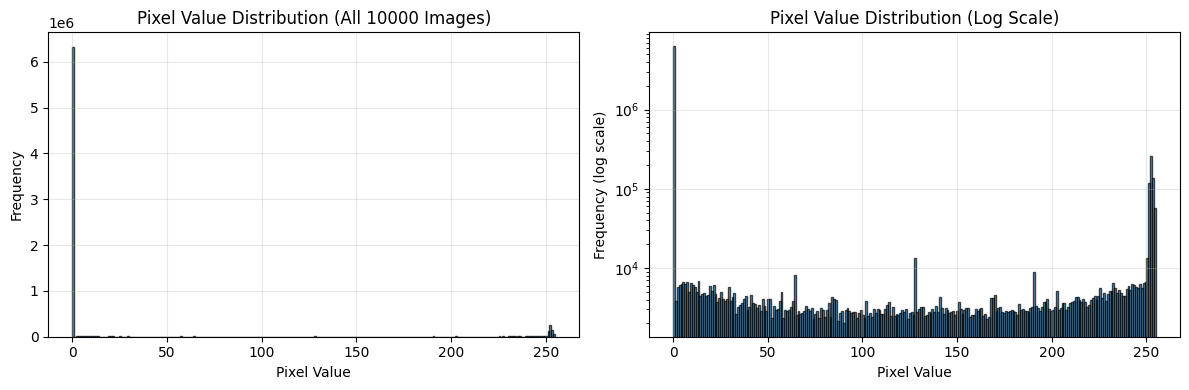

In [18]:
# # Miller-Madow corrected entropy
# h_mm = entropy(all_pixels, approach="miller_madow", base=2)
# h_mm = h_mm.numpy()
# print(f"{'Miller-Madow':<20} | {h_mm:<20.6f}")

# # NSB entropy estimator
# try:
#     h_nsb = entropy(all_pixels, approach="nsb", k=256, base=2)
#     print(f"{'NSB':<20} | {h_nsb:<20.6f}")
# except Exception as e:
#     print(f"{'NSB':<20} | Error: {e}")

# show pixel value distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(all_pixels, bins=256, range=(0, 255), edgecolor="black", alpha=0.7)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title(f"Pixel Value Distribution (All {len(mnist_test)} Images)")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(all_pixels, bins=256, range=(0, 255), edgecolor="black", alpha=0.7, log=True)
plt.xlabel("Pixel Value")
plt.ylabel("Frequency (log scale)")
plt.title("Pixel Value Distribution (Log Scale)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Random Images Individually


pixels.shape (784,)
pixels =  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  78 158 253 210  83   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 131 243 253 252 252 246  90   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  18 213 252 240 

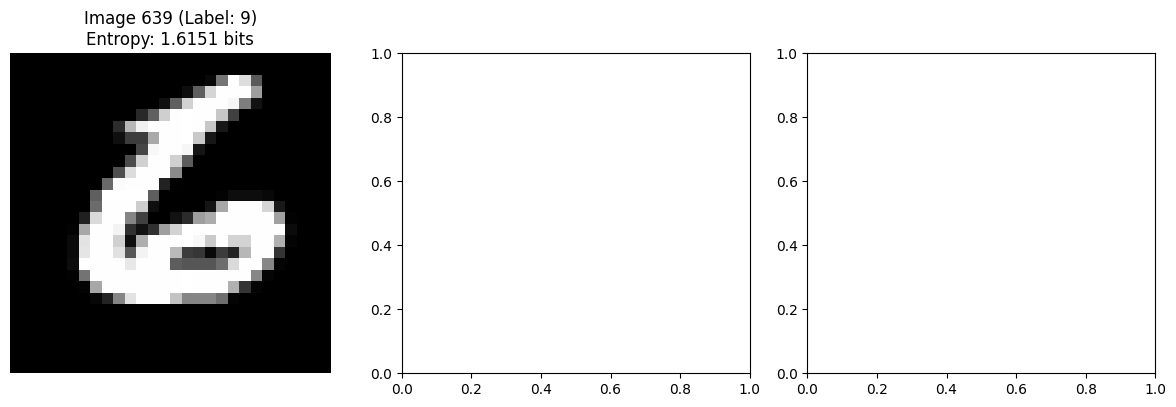


Image Index     | Label      | Entropy (bits) 
---------------------------------------------
639             | 9          | 1.615125       


In [19]:
np.random.seed(42)
random_indices = np.random.choice(len(mnist_test), 1, replace=False)
random_indices = [639]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for idx, img_idx in enumerate(random_indices):
    img_tensor, label = mnist_test[img_idx]

    # print(img_tensor)
    # img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    # pixels = img_np.flatten()
    # print("img_np = ", img_np, img_np.shape)

    pixels = (img_tensor.numpy().squeeze() * 255).astype(int).flatten()
    print("pixels.shape", pixels.shape)
    print("pixels = ", pixels)

    # calculate entropy
    h_discrete = entropy(pixels, approach="discrete", base=2)

    # display image
    axes[idx].imshow(img_np, cmap="gray")
    axes[idx].set_title(
        f"Image {img_idx} (Label: {label})\nEntropy: {h_discrete:.4f} bits"
    )
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

# print detailed entropy values
print(f"\n{'Image Index':<15} | {'Label':<10} | {'Entropy (bits)':<15}")
print("-" * 45)
for img_idx in random_indices:
    img_tensor, label = mnist_test[img_idx]
    img_np = (img_tensor.numpy().squeeze() * 255).astype(int)
    pixels = img_np.flatten()
    h = entropy(pixels, approach="discrete", base=2)
    print(f"{img_idx:<15} | {label:<10} | {h:<15.6f}")
